## Описание проекта

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.  
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.
Инструкция по выполнению проекта

### 1. [Открытие датасета и ознакомление с данными](#1-bullet)
### 2. [Предобработка данных](#2-bullet)
### 3. [Посчитать и добавить в таблицу](#3-bullet)
### 4. [Проведите исследовательский анализ данных и выполните инструкции](#4-bullet)
### 5. [Общий вывод](#5-bullet)

# <a class="anchor" id="1-bullet">1 Открытие датасета и ознакомление с данными</a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
from matplotlib.pyplot import figure
warnings.filterwarnings("ignore")

df = pd.read_csv('real_estate_data.csv', sep='\t')

In [2]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Большинство признаков имеют тип данных float. Посчитаем количество пропусков по каждому столбцу.

In [4]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Разброс пропусков хаотичный, значит нужно детальнее присмотреться к каждому стоблцу. Используем методы describe(), unique(), а также построение гистограммы методом hist().

In [5]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

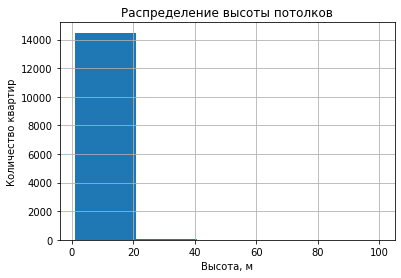

In [6]:
df.hist('ceiling_height', bins=5)
plt.title('Распределение высоты потолков')
plt.xlabel('Высота, м')
plt.ylabel('Количество квартир')
plt.show()

In [7]:
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [8]:
df['ceiling_height'].value_counts().sort_values(ascending=False)

2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
          ... 
3.48         1
3.84         1
2.89         1
1.75         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

Большинство строк имеет высоту пололков в районе 3 метров. Имеются пропуски в количестве 9195 штук, которые будем заменять медианой, т.к. возможно в объявлении не каждый пользователь указывает данное значение. Имеются выбросы со значениями менее 1.25 метра и значением в 100 метров.

In [9]:
df['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

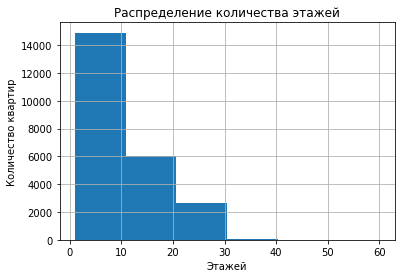

In [10]:
df.hist('floors_total', bins=6)
plt.title('Распределение количества этажей')
plt.xlabel('Этажей')
plt.ylabel('Количество квартир')
plt.show()

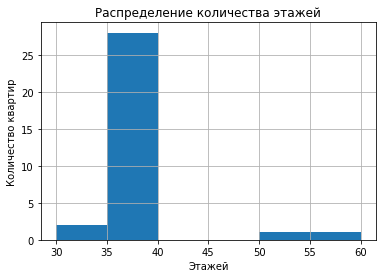

In [11]:
df.hist('floors_total', bins=6, range=(30, 60))
plt.title('Распределение количества этажей')
plt.xlabel('Этажей')
plt.ylabel('Количество квартир')
plt.show()

In [12]:
df['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

Количество этажей. 86 пропущенных значений невелико от общего числа, поэтому их можно смело удалить. 75% объявлений имеет значение до 16 этажей.

In [13]:
df['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

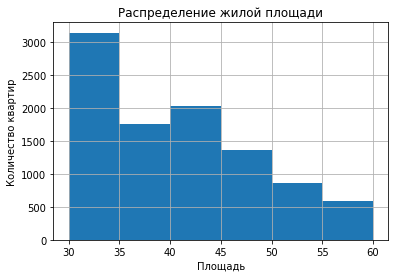

In [14]:
df.hist('living_area', bins=6, range=(30, 60))
plt.title('Распределение жилой площади')
plt.xlabel('Площадь')
plt.ylabel('Количество квартир')
plt.show()

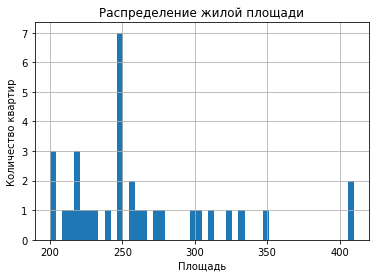

In [15]:
df.hist('living_area', bins=50, range=(200, 410))
plt.title('Распределение жилой площади')
plt.xlabel('Площадь')
plt.ylabel('Количество квартир')
plt.show()

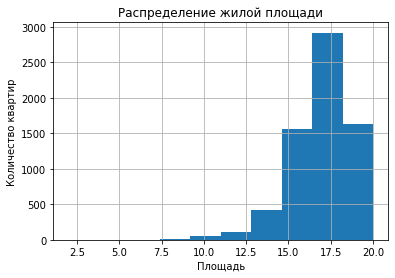

In [16]:
df.hist('living_area', bins=10, range=(2, 20))
plt.title('Распределение жилой площади')
plt.xlabel('Площадь')
plt.ylabel('Количество квартир')
plt.show()

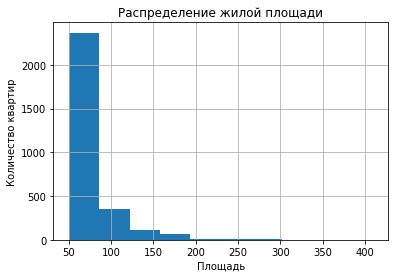

In [17]:
new_df = df.query('living_area > 50')
new_df.hist('living_area')
plt.title('Распределение жилой площади')
plt.xlabel('Площадь')
plt.ylabel('Количество квартир')
plt.show()

Жилая площадь имеет 1903 пропуска, почти 10% от общего числа записей. Есть выбросы в меньшую сторону. Большая часть записей не превышает значение в 50 метров. Выбросы лучше зачистить медианой, предварительно сгруппировав квартиры по количеству комнат.

In [18]:
df['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Почти 90% пропусков значений. Обусловлено тем, что если объект не является апартаментом, пользователь пропускает данное значение. Пропуски можно заменить на False.

In [19]:
df['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

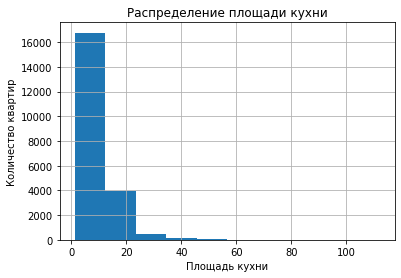

In [20]:
df.hist('kitchen_area')
plt.title('Распределение площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество квартир')
plt.show()

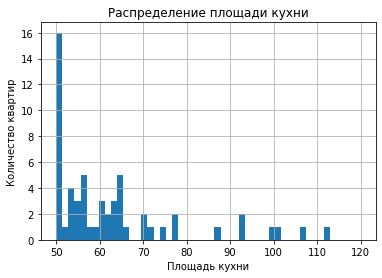

In [21]:
df.hist('kitchen_area', bins=50, range=(50, 120))
plt.title('Распределение площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество квартир')
plt.show()

Порядка 10% пропусков. Основная масса значений не превышает 12 метров. Есть выбросы для проработки.

In [22]:
df['balcony'].describe()

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

In [23]:
df['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

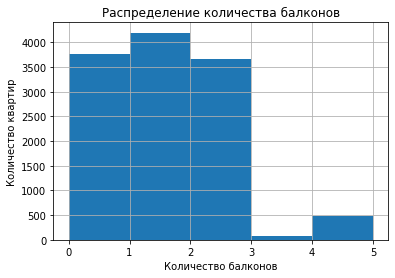

In [24]:
df.hist('balcony', bins=5)
plt.title('Распределение количества балконов')
plt.xlabel('Количество балконов')
plt.ylabel('Количество квартир')
plt.show()

Половина значений - пропуски. Можно предположить, что квартиры просто не имеют балконов.

In [25]:
df['locality_name'].describe()

count               23650
unique                364
top       Санкт-Петербург
freq                15721
Name: locality_name, dtype: object

In [26]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Большинство значений - Санкт-Петербург. 49 пропусков. Поскольку, данные представлены не в числовом формате, сложно оценить причину пропусков.

In [27]:
df['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

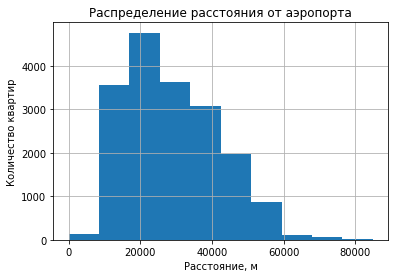

In [28]:
df.hist('airports_nearest')
plt.title('Распределение расстояния от аэропорта')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество квартир')
plt.show()

In [29]:
df[df['airports_nearest'] < 1].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23T00:00:00,1,2.7,9.0,19.8,3,NaN,...,6.0,2.0,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


In [30]:
df['airports_nearest'].isna().sum()

5542

Почти четверть пропусков. Основноая масса значений в диапазоне от 10 до 40 км. Возможно пропуски получены на этапе сбора данных из картографического сервиса. Заменим на медиану.

In [31]:
df['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

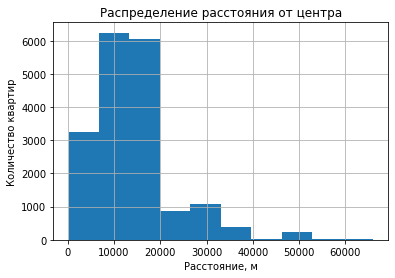

In [32]:
df.hist('cityCenters_nearest')
plt.title('Распределение расстояния от центра')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество квартир')
plt.show()

Большинство значений на диапазоне от 10 до 20 км. Пропуски в данных столбцах встречаются аналогично и в parks_around3000, ponds_around3000. Появляется закономерность. Заменим медианой.

In [33]:
df['parks_around3000'].describe()

count    18181.000000
mean         0.611408
std          0.802074
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

In [34]:
df['parks_around3000'].unique()

array([ 1.,  0.,  2., nan,  3.])

Почти 25% пропусков. Значения от 0 до 3.

In [35]:
df['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

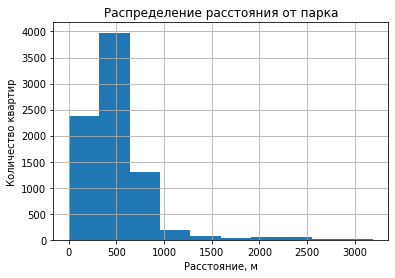

In [36]:
df.hist('parks_nearest')
plt.title('Распределение расстояния от парка')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество квартир')
plt.show()

2/3 значений пропуски. Основная масса имеет парк в радиусе 1 км. Большая доля пропущенных значений, вероятно, заключается в ошибке при сборе данных.

In [37]:
df['ponds_around3000'].describe()

count    18181.000000
mean         0.770255
std          0.938346
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

In [38]:
df['ponds_around3000'].unique()

array([ 2.,  0.,  3.,  1., nan])

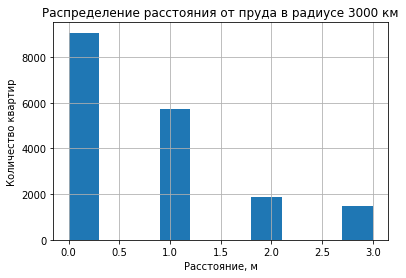

In [39]:
df.hist('ponds_around3000')
plt.title('Распределение расстояния от пруда в радиусе 3000 км')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество квартир')
plt.show()

Значения от 0 до 3. 25% пропусков. Возможно, они означают отсутствие прудов в радиусе 3000 км. Заменим на 0.

In [40]:
df['ponds_nearest'].describe()

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

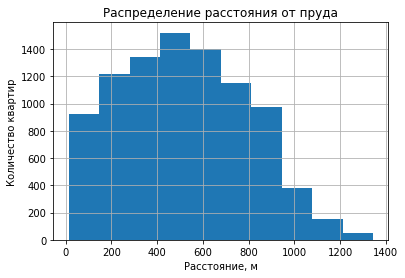

In [41]:
df.hist('ponds_nearest')
plt.title('Распределение расстояния от пруда')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество квартир')
plt.show()

Более 50% пропусков. Основная масса имеет пруд в радиусе километра. Пропуски заменим медианой.

In [42]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

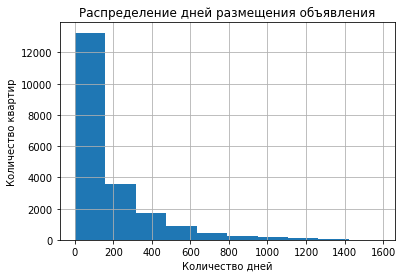

In [43]:
df.hist('days_exposition')
plt.title('Распределение дней размещения объявления')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()

20% значений пропущено. Основная масса имеет длительность размещения в 232 дня.

## Вывод

14 столбцов имеют пропущенные значения. Выбросы имеются везде. Медиана позволяет их сгладить. В некоторых столбцах пропуски лучше не трогать.

# <a class="anchor" id="2-bullet">2 Предобработка данных</a>

#### Замена пропущенных значений 

Проверка на наличие дубликатов

In [44]:
df.duplicated().sum()

0

Замена пропусков на медиану

In [45]:
columns_to_fill_with_median = ['cityCenters_nearest', 'airports_nearest', 'parks_nearest', 'ponds_nearest']
for column in columns_to_fill_with_median:
    df[column] = df[column].fillna(df[column].median())

Замена пропусков на ноль

In [46]:
columns_to_fill_with_null = ['parks_around3000', 'ponds_around3000']
for column in columns_to_fill_with_null:
    df[column] = df[column].fillna(0)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

living_area - сгруппируем по количеству комнат, заполним медианой
is_apartment - Nan будем считать False
balcony - Nan будем считать 0, это неявный пропуск
locality_name - строки с пропусками в данном столбце уберем, т.к. они числовые. Сложно понять, какой это населенный пункт, их всего 49
days_exposition - будем считать, что объявление еще не снято. Из-за Nan, не будем приводить тип к int.

In [48]:
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,-0.029303,-0.024407,0.104756,0.121693,0.002374,-0.038663,0.037085,-0.001466,0.011323,-0.001297,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,-0.025362,-0.008802,0.519869,0.029646,-0.012134,-0.191029,0.197840,0.000518,0.208621,-0.070629,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,-0.072653,-0.034885,0.609121,0.047937,-0.017163,-0.210655,0.200211,-0.000945,0.200294,-0.067398,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,-0.147286,-0.087500,0.269945,0.017991,-0.046525,-0.161203,0.157495,-0.023611,0.121276,-0.034818,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.001674,0.042777,0.087641,0.040523,-0.019139,-0.078832,0.062216,-0.011394,0.072343,-0.043297,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.070151,0.050791,0.163944,0.194065,0.104343,0.025472,-0.158775,0.037884,-0.048698,0.023666,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,-0.056231,-0.033711,0.428674,0.018849,-0.044006,-0.210903,0.212357,-0.023039,0.182439,-0.054709,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.036940,0.035824,0.135531,0.168773,0.070374,0.013565,-0.105212,0.029530,-0.029710,0.015258,-0.039463
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.001674,0.070151,-0.056231,0.036940,1.000000,-0.004235,NaN,0.031455,-0.019352,-0.007239,-0.032014,0.000584,-0.009690,0.001213,-0.022476
open_plan,-0.024407,-0.008802,-0.034885,-0.087500,0.042777,0.050791,-0.033711,0.035824,-0.004235,1.000000,NaN,0.019491,-0.012190,-0.004775,-0.016378,0.002608,-0.004127,-0.002119,-0.024112


In [49]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

1) floors_total имеет хорошую корреляцию с floor (0.678059). Можно распределить столбец floor на 3 группы: 10 этажей, 20 и более 20. Пропуски заполним средним значением по каждой группе.
2) kitchen_area имеет высокую корреляцию с 0.6 с total_area (0.609121). Группируем total_area по значениям Q1 и Q3: 40, 70. Пропуски заменим средним по группе.
3) ceiling_height. Пропуски сгруппируем по значениям Q1 и Q3 (2.5, 2.8) 

In [50]:
def floor_by_group(row):
    if row['floor'] <= 10:
        return 'до 10 этажей'
    elif row['floor'] > 10 and row['floor'] <= 20:
        return '10-20 этажей'
    else:
        return 'более 20 этажей'


df['floor_by_group'] = df.apply(floor_by_group, axis=1)
df['floor_by_group'].value_counts()

до 10 этажей       20127
10-20 этажей        3085
более 20 этажей      487
Name: floor_by_group, dtype: int64

In [51]:
def total_area_by_group(row):
    if row['total_area'] <= 40:
        return 'до 40 кв м'
    elif row['total_area'] > 40 and row['total_area'] <= 70:
        return '40-70 кв м'
    else:
        return 'более 70 кв м'
    
    
df['total_area_by_group'] = df.apply(total_area_by_group, axis=1)
df['total_area_by_group'].value_counts()

40-70 кв м       11919
до 40 кв м        6042
более 70 кв м     5738
Name: total_area_by_group, dtype: int64

In [52]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [53]:
df.query('ceiling_height > 4')['ceiling_height'].count()

75

In [54]:
def ceiling_height_by_group(row):
    if row['ceiling_height'] <= 2.5:
        return 'до 2.5 м'
    elif row['ceiling_height'] > 2.5 and row['ceiling_height'] <= 2.8:
        return 'от 2.5 м до 2.8 м'
    else:
        return 'больше 2.8 м'
    
    
df['ceiling_height_by_group'] = df.apply(ceiling_height_by_group, axis=1)
df['ceiling_height_by_group'].value_counts()

больше 2.8 м         12270
от 2.5 м до 2.8 м     7841
до 2.5 м              3588
Name: ceiling_height_by_group, dtype: int64

In [55]:
df['living_area'] = df.groupby('rooms')['living_area'].apply(lambda x: x.fillna(x.median()))
df['floors_total'] = df.groupby('floor_by_group')['floors_total'].apply(lambda x: x.fillna(x.mean()))
df['kitchen_area'] = df.groupby('total_area_by_group')['kitchen_area'].apply(lambda x: x.fillna(x.mean()))
df['ceiling_height'] = df.groupby('ceiling_height_by_group')['ceiling_height'].apply(lambda x: x.fillna(x.mean()))
#df['living_area'].isna().sum() #0
#df['floors_total'].isna().sum() #0
#df['kitchen_area'].isna().sum() #0
#df['ceiling_height'].isna().sum() #0

#### Изменение типа данных 

В исследуемом датафрейме есть такие поля, как расстояние (кв м), число дней, кол-во водоемов, аэропортов и т.п. Для подобных данных лучше всего использовать тип int

In [56]:
df['is_apartment'] = df['is_apartment'].fillna(False).astype(int)
df['balcony'] = df['balcony'].fillna(False).astype(int)
df.dropna(subset=['locality_name'], inplace=True)
df['locality_name'] = df['locality_name'].replace('деревня Кудрово', 'Кудрово')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   total_images             23650 non-null  int64  
 1   last_price               23650 non-null  float64
 2   total_area               23650 non-null  float64
 3   first_day_exposition     23650 non-null  object 
 4   rooms                    23650 non-null  int64  
 5   ceiling_height           23650 non-null  float64
 6   floors_total             23650 non-null  float64
 7   living_area              23650 non-null  float64
 8   floor                    23650 non-null  int64  
 9   is_apartment             23650 non-null  int32  
 10  studio                   23650 non-null  bool   
 11  open_plan                23650 non-null  bool   
 12  kitchen_area             23650 non-null  float64
 13  balcony                  23650 non-null  int32  
 14  locality_name         

In [57]:
columns_to_int = ['floors_total', 'floor', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']
for column in columns_to_int:
    df[column] = df[column].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   total_images             23650 non-null  int64  
 1   last_price               23650 non-null  float64
 2   total_area               23650 non-null  float64
 3   first_day_exposition     23650 non-null  object 
 4   rooms                    23650 non-null  int64  
 5   ceiling_height           23650 non-null  float64
 6   floors_total             23650 non-null  int32  
 7   living_area              23650 non-null  float64
 8   floor                    23650 non-null  int32  
 9   is_apartment             23650 non-null  int32  
 10  studio                   23650 non-null  bool   
 11  open_plan                23650 non-null  bool   
 12  kitchen_area             23650 non-null  float64
 13  balcony                  23650 non-null  int32  
 14  locality_name         

Вывод: ряд значений были заменены медианой, т.к. она сглаживает выбросы. Ряд метрик приведены к целочисленному типа данных.

# <a class="anchor" id="3-bullet">3 Посчитать и добавить в таблицу</a>

#### Цена квадратного метра 

Разделим цену продажи на общую площадь

In [58]:
df['price_per_meter'] = df['last_price'] / df['total_area']

#### День недели, месяц и год публикации объявления 

При помощи метода to_datetime приведем столбец first_day_exposition к нужному виду. Далее добавим новые столбцы в датафрейм

In [59]:
df['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [60]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df['first_day_exposition'][0]

Timestamp('2019-03-07 00:00:00')

In [61]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

#### Добавляем этаж квартиры 

Напишем функцию, которая категоризирует значение floor на нужные категории.

In [62]:
def floor_by_group(row):
    if row['floor'] == 1:
        return 'Первый'
    elif row['floor'] == row['floors_total']:
        return 'Последний'
    else:
        return 'Другой'
    
    
df['floor_by_group'] = df.apply(floor_by_group, axis=1)
df['floor_by_group'].value_counts()

Другой       17400
Последний     3338
Первый        2912
Name: floor_by_group, dtype: int64

#### Добавляем соотношение жилой и общей площади

Создадим два новых признака. Первый - отношение жилой площади к общей. Второй - отношение площади кухни к общей.

In [63]:
df['living_area_part'] = df['living_area'] / df['total_area']
df['kitchen_part'] = df['kitchen_area'] / df['total_area']

In [64]:
df['living_area_part'].value_counts()

0.500000    350
0.600000    212
0.666667    177
0.562500    128
0.625000    100
           ... 
0.381609      1
0.381282      1
0.631222      1
0.713158      1
0.652568      1
Name: living_area_part, Length: 12157, dtype: int64

In [65]:
df['kitchen_part'].value_counts()

0.200000    205
0.250000    195
0.166667    167
0.187500    133
0.142857    132
           ... 
0.203562      1
0.173592      1
0.152735      1
0.163373      1
0.125673      1
Name: kitchen_part, Length: 11039, dtype: int64

Вывод: добавлены новые признаки для вычисления зависимостей в дальнейшем. Появилась возможность группировки объявлений по годам, месяцам и т.п.

# <a class="anchor" id="4-bullet">4 Проведите исследовательский анализ данных и выполните инструкции</a>

**Изучим цену,общую площадь,комнаты и высоту потолка**

Выведем гистограммы для 'last_price','total_area','rooms','ceiling_height' с пределами верхней и нижней границы равными Q1 - 3IQR и Q3 + 3IQR. Изучим их.

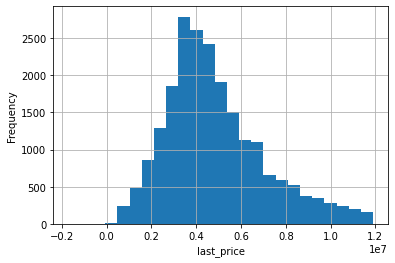

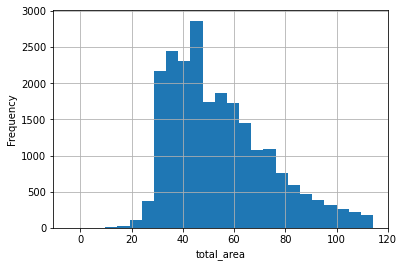

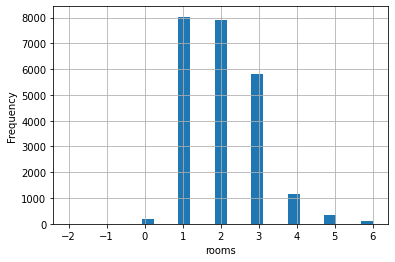

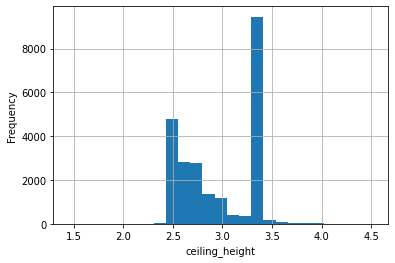

In [66]:
list=('last_price','total_area','rooms','ceiling_height')
for i in list:
    q1, q3 = np.nanpercentile(df[i], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    df[i].plot(kind='hist', bins=25, range=(lower_bound,upper_bound), grid=True)
    plt.xlabel(i)
    plt.show()

#### Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра 

Автоматизируем процесс: выберем нужные столбцы, создадим функции для вывода гистограмм

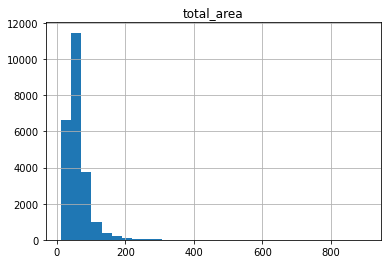

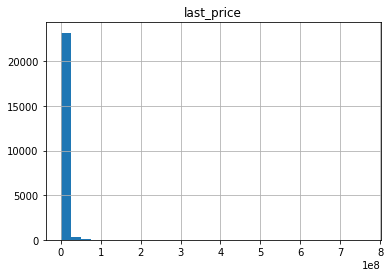

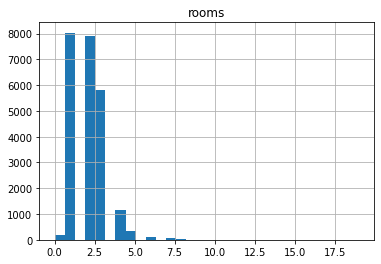

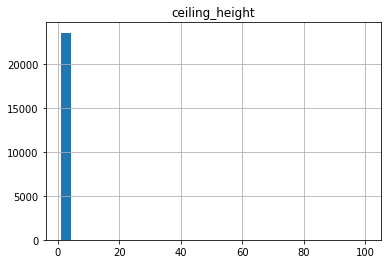

In [67]:
columns_to_hist = ['total_area', 'last_price', 'rooms', 'ceiling_height']

def hist_func(dataframe, column):
    dataframe.hist(column, bins=30)
    
    
for column in columns_to_hist:
    hist_func(df, column)

Гистограммы получились неинформативные, сделаем индивидуальные для каждого признака

Text(0, 0.5, 'Количество квартир')

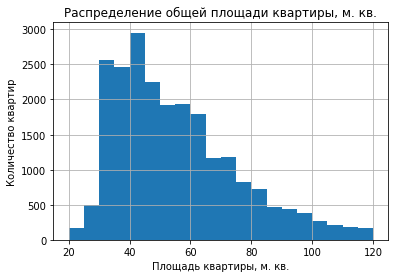

In [68]:
df.hist('total_area', bins=20, range=(20, 120))
plt.title('Распределение общей площади квартиры, м. кв.')
plt.xlabel('Площадь квартиры, м. кв.')
plt.ylabel('Количество квартир')

Общая площадь в среднем имеет значение от 30 до 60 кв м. Далее будет пункт, где нужно очистить данные от выбросов,поэтому здесь я этого делать буду.

Text(0, 0.5, 'Количество квартир')

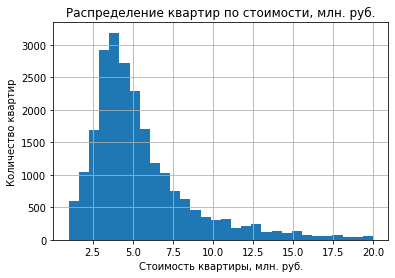

In [69]:
df['last_price_in_million'] = df['last_price'] / 1000000
df.hist('last_price_in_million', bins=30, range=(1, 20))
plt.title('Распределение квартир по стоимости, млн. руб.')
plt.xlabel('Стоимость квартиры, млн. руб.')
plt.ylabel('Количество квартир')

Большинство квартир имеют цену продажи от 2,5 до 6млн

Text(0, 0.5, 'Количество квартир')

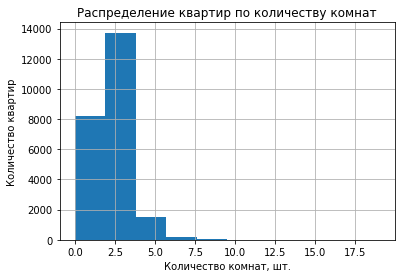

In [70]:
df.hist('rooms', bins=10)
plt.title('Распределение квартир по количеству комнат')
plt.xlabel('Количество комнат, шт.')
plt.ylabel('Количество квартир')

Чаще всего квартиры имеют 1-3 комнаты

Text(0, 0.5, 'Количество квартир')

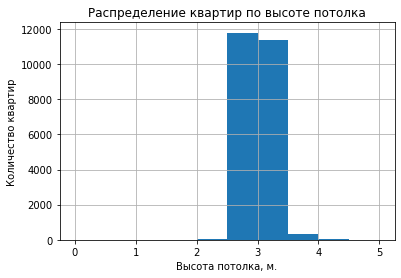

In [71]:
df.hist('ceiling_height', bins=10, range=(0,5))
plt.title('Распределение квартир по высоте потолка')
plt.xlabel('Высота потолка, м.')
plt.ylabel('Количество квартир')

Чаще всего высота потолка от 2.5 до 3.5 метров.

Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можносчитать, что продажи прошли очень быстро, а когда необычно долго?

In [72]:
df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday,month,year,living_area_part,kitchen_part,last_price_in_million
total_images,1.000000,0.104558,0.115893,0.099660,-0.030203,0.009033,0.106656,0.030832,0.010512,-0.029389,...,0.011077,-0.001552,-0.027415,0.132652,-0.010510,0.004837,0.140884,-0.001409,-0.045524,0.104558
last_price,0.104558,1.000000,0.653743,0.363421,0.050408,-0.006758,0.556149,0.026770,0.026964,-0.025363,...,0.208842,-0.070936,0.080937,0.736562,0.001607,0.002741,-0.042927,-0.036702,-0.112698,1.000000
total_area,0.115893,0.653743,1.000000,0.758745,0.058912,-0.075045,0.909738,-0.024178,0.029683,-0.072670,...,0.200833,-0.067846,0.149571,0.302202,-0.004648,0.004924,-0.079496,0.075063,-0.356320,0.653743
rooms,0.099660,0.363421,0.758745,1.000000,0.019608,-0.227216,0.852959,-0.150604,0.000422,-0.147371,...,0.121450,-0.035475,0.126497,0.055471,-0.004316,-0.004388,-0.054641,0.455929,-0.603597,0.363421
ceiling_height,-0.030203,0.050408,0.058912,0.019608,1.000000,0.007127,0.050795,0.011086,0.132304,0.005582,...,0.044882,-0.034002,-0.000793,0.077436,0.006624,0.006562,-0.057568,-0.016067,0.034328,0.050408
floors_total,0.009033,-0.006758,-0.075045,-0.227216,0.007127,1.000000,-0.170395,0.678959,-0.026428,0.070483,...,-0.048897,0.024217,-0.052571,0.148299,0.012847,0.016347,0.007813,-0.349862,0.340316,-0.006758
living_area,0.106656,0.556149,0.909738,0.852959,0.050795,-0.170395,1.000000,-0.098265,0.028039,-0.056431,...,0.179078,-0.055412,0.140463,0.212304,-0.006180,-0.000847,-0.073103,0.398436,-0.491751,0.556149
floor,0.030832,0.026770,-0.024178,-0.150604,0.011086,0.678959,-0.098265,1.000000,-0.013321,0.036978,...,-0.029920,0.015842,-0.039501,0.129143,0.011746,0.019480,0.005273,-0.255136,0.234888,0.026770
is_apartment,0.010512,0.026964,0.029683,0.000422,0.132304,-0.026428,0.028039,-0.013321,1.000000,-0.003665,...,0.024467,0.003512,0.015303,0.044734,-0.009488,0.002352,0.009313,0.001094,0.017033,0.026964
studio,-0.029389,-0.025363,-0.072670,-0.147371,0.005582,0.070483,-0.056431,0.036978,-0.003665,1.000000,...,-0.009656,0.001202,-0.022447,0.015626,-0.000818,0.000944,0.011775,0.085762,0.140900,-0.025363


Применив df.corr(), оказалось, что у  days_exposition хорошая отрицательная корреляция с годом. Сгруппируем по году и заменим пропуски медианой

In [73]:
df['days_exposition'].isna().sum()

3180

In [74]:
df['days_exposition'] = df.groupby('year')['days_exposition'].apply(lambda x: x.fillna(x.median()))

In [75]:
df['days_exposition'].isna().sum()

0

In [76]:
df['days_exposition'].quantile(0.05)

10.0

In [77]:
df['days_exposition'].quantile(0.95)

608.0

In [78]:
df['days_exposition'].describe()

count    23650.000000
mean       165.027548
std        211.949527
min          1.000000
25%         35.000000
50%         80.000000
75%        203.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [79]:
df['days_exposition'].median()

80.0

Text(0, 0.5, 'Количество квартир')

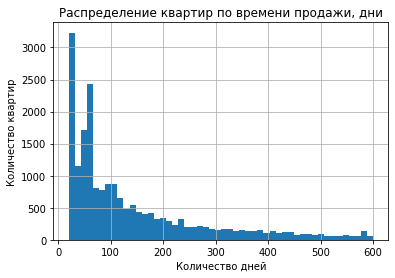

In [80]:
df.hist('days_exposition', bins=50, range=(20, 600))
plt.title('Распределение квартир по времени продажи, дни')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')

#### Вывод 

Среднее число дней продажи квартиры почти в два раза выше медианы. Это говорит о том, что существует много выбросов, которые искажают среднее значение. На диаграмме это подтверждается - большая часть квартир продается в первые 100 дней. Необычно быстрые и долгие продажи квартир можно посомтреть по значению персентилей: 10 и 625 соответственно При этом есть два пика в районе 30 и 90 дней

Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

Посмотрим на распределение total_area

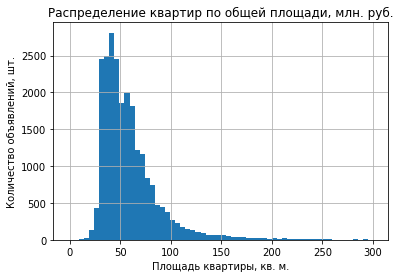

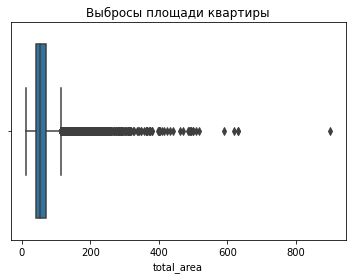

In [81]:
df.hist('total_area', bins=60, range=(-1, 300))
plt.title('Распределение квартир по общей площади, млн. руб.')
plt.xlabel('Площадь квартиры, кв. м.')
plt.ylabel('Количество объявлений, шт.')
plt.show()
sns.boxplot(df['total_area'])
plt.title('Выбросы площади квартиры')
plt.show()

In [82]:
df.query('total_area > 300').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,floor_by_group,total_area_by_group,ceiling_height_by_group,price_per_meter,weekday,month,year,living_area_part,kitchen_part,last_price_in_million
155,8,96000000.0,317.0,2017-07-07,4,3.50,3,183.000,3,0,...,Последний,более 70 кв м,больше 2.8 м,302839.116719,4,7,2017,0.577287,0.048604,96.00000
581,20,65000000.0,365.0,2019-03-18,7,2.90,7,145.000,7,0,...,Последний,более 70 кв м,больше 2.8 м,178082.191781,0,3,2019,0.397260,0.042212,65.00000
660,3,49950000.0,483.9,2017-10-04,7,3.20,6,312.500,4,0,...,Другой,более 70 кв м,больше 2.8 м,103223.806572,2,10,2017,0.645795,0.054557,49.95000
793,20,135000000.0,310.0,2018-05-22,4,3.30,5,250.000,2,0,...,Другой,более 70 кв м,больше 2.8 м,435483.870968,1,5,2018,0.806452,0.161290,135.00000
866,5,25000000.0,363.0,2017-12-23,14,3.16,5,222.000,4,0,...,Другой,более 70 кв м,больше 2.8 м,68870.523416,5,12,2017,0.611570,0.045730,25.00000
1026,20,155000000.0,310.0,2018-10-12,5,5.30,3,190.000,3,0,...,Последний,более 70 кв м,больше 2.8 м,500000.000000,4,10,2018,0.612903,0.203226,155.00000
1085,16,75000000.0,323.0,2017-07-10,5,4.00,5,255.700,4,0,...,Другой,более 70 кв м,больше 2.8 м,232198.142415,0,7,2017,0.791641,0.204334,75.00000
1388,20,59800000.0,399.0,2015-01-21,5,5.60,6,91.785,6,0,...,Последний,более 70 кв м,больше 2.8 м,149874.686717,2,1,2015,0.230038,0.038615,59.80000
1494,10,65000000.0,364.0,2018-11-27,7,3.90,6,250.000,3,0,...,Другой,более 70 кв м,больше 2.8 м,178571.428571,1,11,2018,0.686813,0.054945,65.00000
2243,9,130278280.0,304.0,2015-07-24,5,3.11,9,91.785,7,0,...,Другой,более 70 кв м,больше 2.8 м,428546.973684,4,7,2015,0.301924,0.050683,130.27828


Аномальными будем считать квартиры с площадью менее 16. Дорогие квартиры имеют очень большую площадь. Нельзя с уверенностью сказать, что это выбросы

In [83]:
df = df.query('total_area >= 16')

Посмотрим на распределение living_area

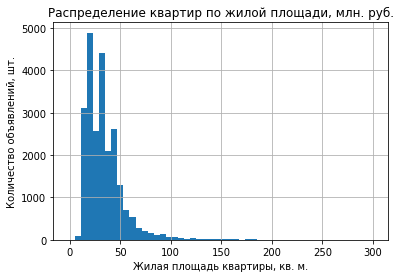

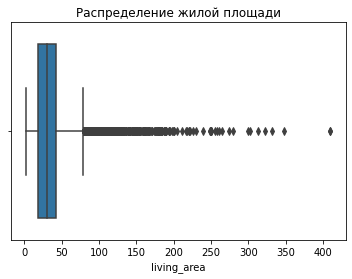

In [84]:
df.hist('living_area', bins=50, range=(-1, 300))
plt.title('Распределение квартир по жилой площади, млн. руб.')
plt.xlabel('Жилая площадь квартиры, кв. м.')
plt.ylabel('Количество объявлений, шт.')
plt.show()
sns.boxplot(df['living_area'])
plt.title('Распределение жилой площади')
plt.show()

Здесь распределение выглядит нормальным, так же есть выбросы, но и здесь тоже большая жилая площадь обусловленавысокой ценой

In [85]:
df = df.query('living_area >= 9')

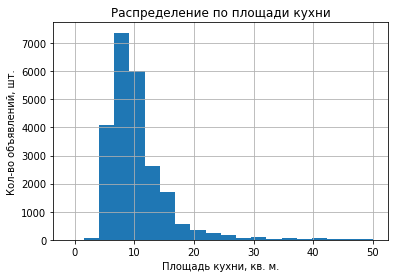

In [86]:
df.hist('kitchen_area', bins=20, range=(-1,50))
plt.title('Распределение по площади кухни')
plt.xlabel('Площадь кухни, кв. м.')
plt.ylabel('Кол-во объявлений, шт.')
plt.show()

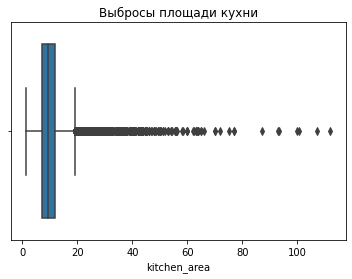

In [87]:
sns.boxplot(df['kitchen_area'])
plt.title('Выбросы площади кухни')
plt.show()

Будем считать, что кухня не может быть меньше 4 кв. м. Квартиры, где кухня имеет большую площадь, имеют так же большую общую площадь. С уверенность назвать это аномалией нельзя.

In [88]:
df.query('kitchen_area < 4')['kitchen_area'].count()
df=df.query('kitchen_area >= 4')

Посмотрим на распределение комнат

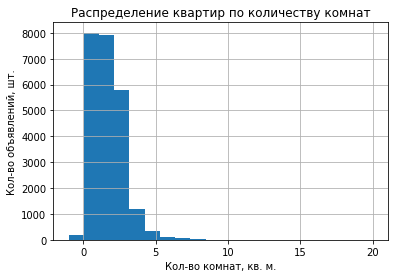

In [89]:
df.hist('rooms', bins=20, range=(-1,20))
plt.title('Распределение квартир по количеству комнат')
plt.xlabel('Кол-во комнат, кв. м.')
plt.ylabel('Кол-во объявлений, шт.')
plt.show()

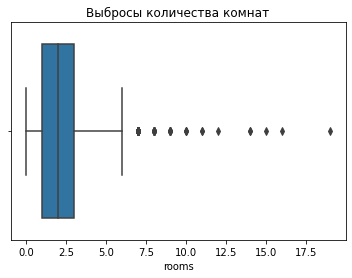

In [90]:
sns.boxplot(df['rooms'])
plt.title('Выбросы количества комнат')
plt.show()

Уберем квартиры, где комнат меньше одной и больше 8

In [91]:
df.query('rooms < 1')['rooms'].count()
df.query('rooms > 8')['rooms'].count()
df=df.query('rooms >= 1 and rooms <= 6')

Расмотрим ceiling_height

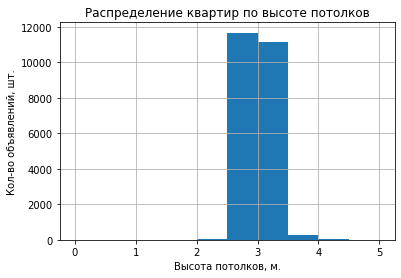

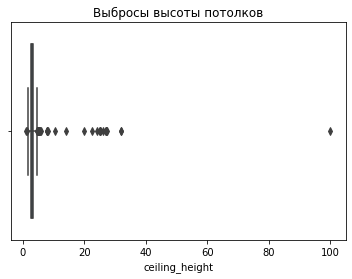

In [92]:
df.hist('ceiling_height', bins=10, range=(0,5))
plt.title('Распределение квартир по высоте потолков')
plt.xlabel('Высота потолков, м.')
plt.ylabel('Кол-во объявлений, шт.')
plt.show()
sns.boxplot(df['ceiling_height'])
plt.title('Выбросы высоты потолков')
plt.show()

Уберем квартиры с высотой потолка более 4 метров и менее 2.4

In [93]:
df = df.query('ceiling_height >= 2.4 and ceiling_height <= 4')

Посмотрим на цену квартиры в контексте с общей площадью

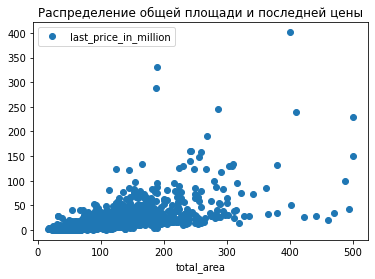

In [94]:
df.plot(x='total_area', y='last_price_in_million', style='o')
plt.title('Распределение общей площади и последней цены')
plt.show()

В целом распределение нормальное. Есть выбросы. Но здесь видно, что высокая цена объясняется большой площадью

Уберем объявления, имеющие большую площадь и при этом необычно низкую цену.

In [95]:
condition = (df['total_area'] < 100) | (df['last_price_in_million'] > 5)
condition.value_counts()

True     23196
False       28
dtype: int64

In [96]:
df = df[condition]

In [97]:
df.head()
#df.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,floor_by_group,total_area_by_group,ceiling_height_by_group,price_per_meter,weekday,month,year,living_area_part,kitchen_part,last_price_in_million
0,20,13000000.0,108.0,2019-03-07,3,2.700000,16,51.0,8,0,...,Другой,более 70 кв м,от 2.5 м до 2.8 м,120370.370370,3,3,2019,0.472222,0.231481,13.000
1,7,3350000.0,40.4,2018-12-04,1,3.366758,11,18.6,1,0,...,Первый,40-70 кв м,больше 2.8 м,82920.792079,1,12,2018,0.460396,0.272277,3.350
2,10,5196000.0,56.0,2015-08-20,2,3.366758,5,34.3,4,0,...,Другой,40-70 кв м,больше 2.8 м,92785.714286,3,8,2015,0.612500,0.148214,5.196
3,0,64900000.0,159.0,2015-07-24,3,3.366758,14,45.0,9,0,...,Другой,более 70 кв м,больше 2.8 м,408176.100629,4,7,2015,0.283019,0.096903,64.900
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14,32.0,13,0,...,Другой,более 70 кв м,больше 2.8 м,100000.000000,1,6,2018,0.320000,0.410000,10.000


Посмотрим на cityCenters_nearest

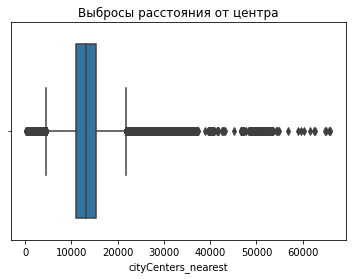

In [98]:
sns.boxplot(df['cityCenters_nearest'])
plt.title('Выбросы расстояния от центра')
plt.show()

Уберем только самые дальние от центра квартиры

In [99]:
#df.query('cityCenters_nearest > 20000').groupby('locality_name')['cityCenters_nearest'].mean()
df = df.query('cityCenters_nearest < 55000')

Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучитезависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: днянедели, месяца и года.

Попробуем по отфильтрованным данным. Создадим сокращенный датафрейм с признаками, которые нам нужны. Отсортируем в порядке убывания признаки

In [100]:
df_short = df[['last_price_in_million', 'total_area', 'rooms', 'cityCenters_nearest', 'floor_by_group', 'weekday', 'month', 'year']]
df_short.head()

,last_price_in_million,total_area,rooms,cityCenters_nearest,floor_by_group,weekday,month,year
0,13.000,108.0,3,16028,Другой,3,3,2019
1,3.350,40.4,1,18603,Первый,1,12,2018
2,5.196,56.0,2,13933,Другой,3,8,2015
3,64.900,159.0,3,6800,Другой,4,7,2015
4,10.000,100.0,2,8098,Другой,1,6,2018


Для признаков, которые имеют большое число уникальных значений (total_area, cityCenters_nearest) воспользуемся корреляцией

In [101]:
df_short.corr()

,last_price_in_million,total_area,rooms,cityCenters_nearest,weekday,month,year
last_price_in_million,1.000000,0.676884,0.367435,-0.218702,0.001561,-0.005904,-0.048861
total_area,0.676884,1.000000,0.750504,-0.211945,-0.004194,0.004046,-0.085924
rooms,0.367435,0.750504,1.000000,-0.153477,-0.003738,-0.000382,-0.054983
cityCenters_nearest,-0.218702,-0.211945,-0.153477,1.000000,0.006889,-0.005047,0.023365
weekday,0.001561,-0.004194,-0.003738,0.006889,1.000000,0.009816,-0.002507
month,-0.005904,0.004046,-0.000382,-0.005047,0.009816,1.000000,-0.270366
year,-0.048861,-0.085924,-0.054983,0.023365,-0.002507,-0.270366,1.000000


Хорошо видно, что цена имеет коррреляцию с общей площадью квартиры. Так же есть небольшая корреляция с количеством комнат и небольшая отрицательная корреляция со столбцом cityCenters_nearest

[Text(0.5, 1.0, 'Heatmap по всей выборке')]

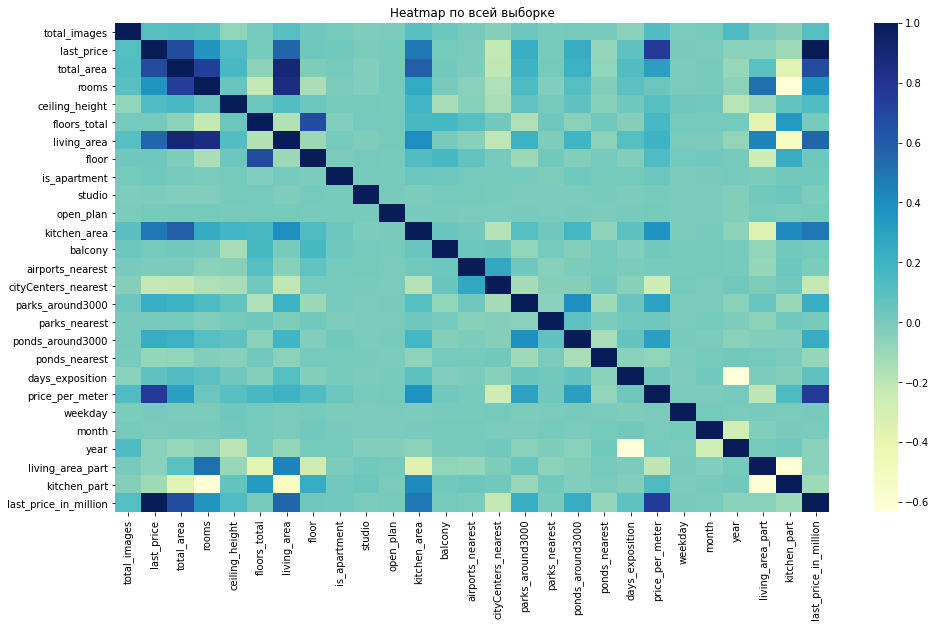

In [102]:
fig, ax = plt.subplots(figsize=(16,9))    
ax = sns.heatmap(df.corr(), cmap="YlGnBu", ax=ax)
ax.set(title="Heatmap по всей выборке")

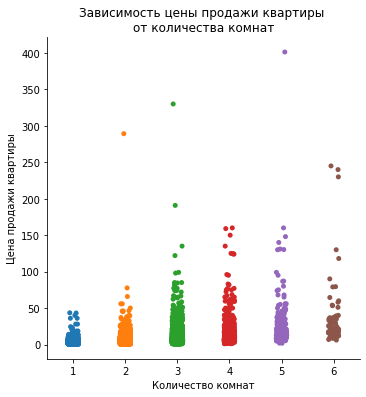

In [103]:
ax = sns.catplot(x="rooms", y="last_price_in_million", data=df)
ax.set(xlabel='Количество комнат', ylabel='Цена продажи квартиры', 
       title="Зависимость цены продажи квартиры \nот количества комнат")

In [104]:
## Будем поочередно группировать по одному из признаков. Для автоматизации напишем функцию. Применим ее в цикле.
def pivot_table_func(df, column):
    return df.pivot_table(index=column, values='last_price_in_million').sort_values(by='last_price_in_million', ascending=False).head()
    
    
columns_for_pivot= ['rooms', 'floor_by_group', 'year', 'month', 'weekday']
pd.options.display.float_format='{:.3f}'.format## нужный формат
for column in columns_for_pivot:
    print(pivot_table_func(df, column))
    print()
    print()

       last_price_in_million
rooms                       
6                     31.720
5                     22.738
4                     13.403
3                      8.167
2                      5.588


                last_price_in_million
floor_by_group                       
Другой                          6.606
Последний                       6.520
Первый                          4.720


      last_price_in_million
year                       
2014                 11.874
2015                  8.180
2016                  6.786
2019                  6.599
2017                  6.262


       last_price_in_million
month                       
4                      6.605
5                      6.513
1                      6.513
12                     6.484
2                      6.450


         last_price_in_million
weekday                       
3                        6.545
5                        6.395
2                        6.376
4                        6.349
1             

#### Вывод

1) Чем больше комнат, тем выше цена  
2) Самая высокая в среднем цена пришлась на 2014г, далее идет снижение до 2017г  
3) Зависимость цены от месяца подачи объявления не выявлено  
4) Цена квартиры на первом этаже имеет более низкую стоимость, чем на последнем или другом.

Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

Поместим топ 10 в список. Создадим новый датафрейм только с этими населенными пунктами. Сделаем групппировку по населенным пунктам, посчитаем среднюю цену. Добавим новый признак - цену квадратного метра и отсортируем по нему.

In [105]:
top_ten_locality_name = df['locality_name'].value_counts().sort_values(ascending=False).head(10)
#type(top_ten_locality_name)
#list_top_ten = list(top_ten_locality_name.index)
list_top_ten = top_ten_locality_name.index.tolist()

In [106]:
df_top_ten_locality_name = df.query('locality_name in @list_top_ten')
df_pivot = df_top_ten_locality_name.pivot_table(index='locality_name', values=['total_area', 'last_price', 'cityCenters_nearest'])
df_pivot['mean_square_metre_price'] = df_pivot['last_price'] / df_pivot['total_area']
df_pivot.sort_values(by='mean_square_metre_price', ascending=False)

,cityCenters_nearest,last_price,total_area,mean_square_metre_price
locality_name,,,,
Санкт-Петербург,11657.901,7786702.433,63.628,122379.446
Пушкин,28690.981,6373153.727,60.765,104881.559
Кудрово,13098.000,4445603.911,47.370,93848.026
посёлок Парголово,19929.894,4503557.326,51.337,87724.914
посёлок Мурино,13098.000,3744125.366,45.253,82737.936
посёлок Шушары,24194.380,4124552.993,54.154,76163.002
Колпино,32051.356,3866288.564,52.358,73842.927
Гатчина,13098.000,3494653.639,50.644,69004.923
Всеволожск,13098.000,3824615.295,56.542,67641.870


In [107]:
df_realty_10cities = (df.pivot_table(index='locality_name', 
                 values='price_per_meter',
                 aggfunc=['median','count']).reset_index().sort_values(('count','price_per_meter'), ascending=False).loc[:10])

In [108]:
#df_realty_10cities.loc[:10,[('count','price_per_meter'),('median','price_per_meter')]]
df_realty_10cities

,locality_name,median,count
,,price_per_meter,price_per_meter
33,Санкт-Петербург,104591.837,15421
286,посёлок Мурино,84192.736,492
17,Кудрово,95435.613,450
320,посёлок Шушары,76747.967,434
3,Всеволожск,65789.474,390
32,Пушкин,99865.713,366
13,Колпино,74722.222,337
291,посёлок Парголово,91984.437,322
6,Гатчина,67924.528,305


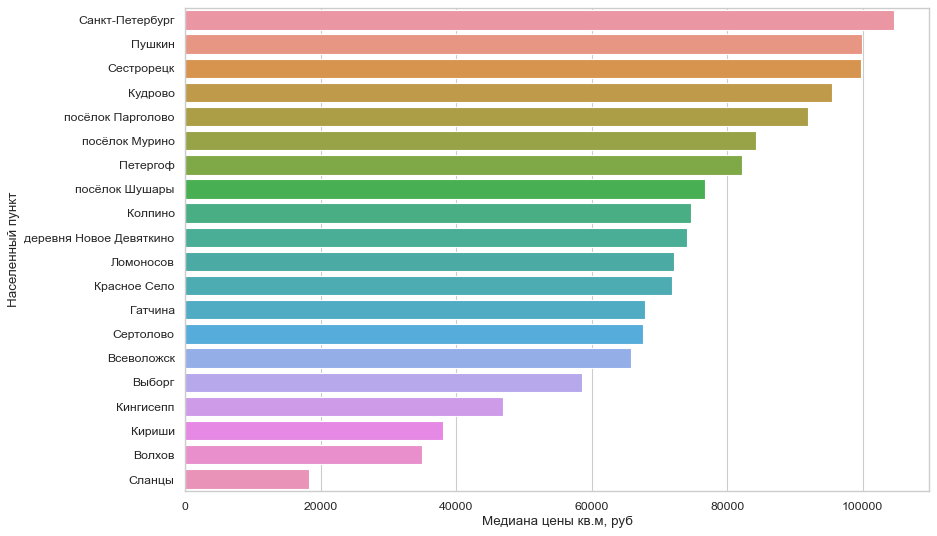

In [109]:
figure(figsize=(12,8),dpi=80)
sns.set(style="whitegrid")
sns.barplot(x=('median','price_per_meter'),y='locality_name',ci='sd', data=df_realty_10cities.sort_values(('median','price_per_meter'),ascending=False))
plt.xlabel('Медиана цены кв.м, руб')
plt.ylabel('Населенный пункт')
plt.show()

#### Вывод 

Самая высокая цена за кв м в Санкт-Петербурге - выше 100 тыс за кв м. Далее близко по значению находится Пушкин. Самые дешевые квартиры из топ-10 находятся в Выборге.

Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. Послеэтого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определитеграницу, где график сильно меняется — это и будет центральная зона.

Выделим только те квартиры, которые находятся в Санкт-Петербурге. Добавим новый признак - расстояние в км до центра к новому датафрейму. Сгруппируем по этому признаку и посчитаем среднюю цену для каждой группы. Построим график.

<AxesSubplot:xlabel='cityCenters_nearest_km'>

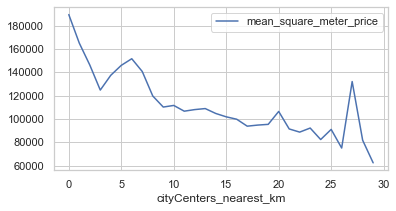

In [110]:
spb_only = df.query('locality_name == "Санкт-Петербург"')
spb_only['cityCenters_nearest_km'] = (spb_only['cityCenters_nearest'] / 1000).astype(int)
spb_only['mean_square_meter_price'] = spb_only['last_price'] / df['total_area']
spb_only.pivot_table(index='cityCenters_nearest_km', values='mean_square_meter_price').plot(y='mean_square_meter_price', grid=True, figsize=(6,3))

Цена сильно меняется при расстоянии более 7 км от центра и далее сползает постепенно вниз. Будем считать, что этаграница и есть центр

Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков.Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

Создадим датафрейм, где будут квартиры, которые находятся на расстоянии не более 7 км от центра

Text(0, 0.5, 'Количество квартир')

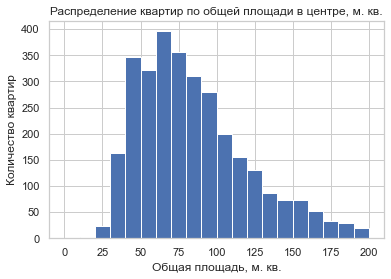

In [111]:
center_only = spb_only.query('cityCenters_nearest_km < 7')
columns_to_show = ['total_area', 'last_price_in_million', 'rooms', 'ceiling_height']
center_only.hist('total_area', bins=20, range=(0,200))
plt.title('Распределение квартир по общей площади в центре, м. кв.')
plt.xlabel('Общая площадь, м. кв.')
plt.ylabel('Количество квартир')
#for column in columns_to_show:
#    sns.boxplot(df[column])
#    plt.show()

В целом в центре более крупные по площади квартиры: от 40 до 90м кв. До фильтрации было 30-60 кв м.

Text(0, 0.5, 'Количество квартир')

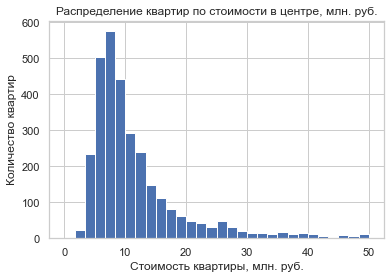

In [112]:
center_only.hist('last_price_in_million', bins=30, range=(0,50))
plt.title('Распределение квартир по стоимости в центре, млн. руб.')
plt.xlabel('Стоимость квартиры, млн. руб.')
plt.ylabel('Количество квартир')

То же самое по цене: от 5 до 9 млн рублей. До фильтрации: 2.5 - 6 млн

Text(0, 0.5, 'Количество квартир')

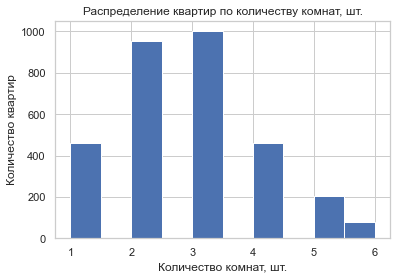

In [113]:
center_only.hist('rooms', bins=10)
plt.title('Распределение квартир по количеству комнат, шт.')
plt.xlabel('Количество комнат, шт.')
plt.ylabel('Количество квартир')

По количеству комнат разница не сильная: чаще всего квартиры имеют 2-3 комнаты

Text(0, 0.5, 'Количество квартир')

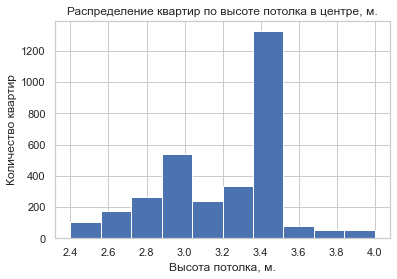

In [114]:
center_only.hist('ceiling_height', bins=10)
plt.title('Распределение квартир по высоте потолка в центре, м.')
plt.xlabel('Высота потолка, м.')
plt.ylabel('Количество квартир')

Большинство квартир имеют высоту потолков 3.4 м Есть и второй небольшой пик - 3м, которого не было видно ранее на не отфильтрованных данных

Сравним признаки с двух срезов: квартиры в центре города и квартиры в Санкт-Петербурге.

<AxesSubplot:ylabel='Frequency'>

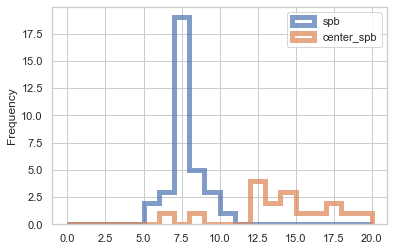

In [115]:
ax = spb_only.pivot_table(index='floor', values='last_price_in_million').plot(kind='hist', y='last_price_in_million', histtype='step', range=(0,20), bins=20, linewidth=5, alpha=0.7, label='spb')
center_only.pivot_table(index='floor', values='last_price_in_million').plot(kind='hist', y='last_price_in_million', histtype='step', range=(0,20), bins=20, linewidth=5, alpha=0.7, label='center_spb', ax=ax, grid=True, legend=True)

В центре квартиры расположенным на более высоком этаже. В центре такие квартиры нахожятся начиная с 6 этажа. Тогда как во всем Санкт-Петербурге на этот этаж приходится больше всего квартир. Можно предположить, что в центре больше многоэтажных домов. Пик в центре приходится на 12 этаж.

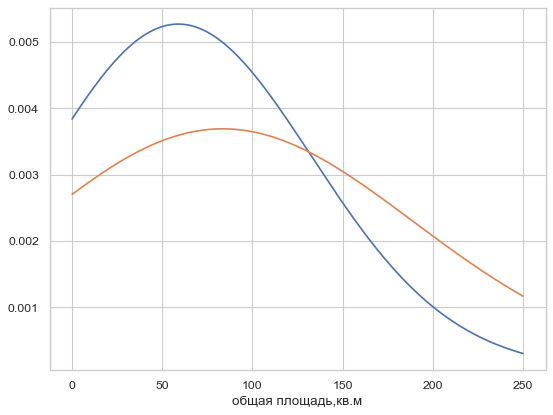

In [116]:
figure( figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
x = center_only['total_area']
y = spb_only['total_area']
bins = np.linspace(0, 400, 200)
sns.kdeplot(y, bw=2, label='Весь Санкт-Петербург', clip=(0,250))
sns.kdeplot(x, bw=2, label='Центр города', clip=(0,250))
plt.xlabel('общая площадь,кв.м')
plt.ylabel('')
plt.show()

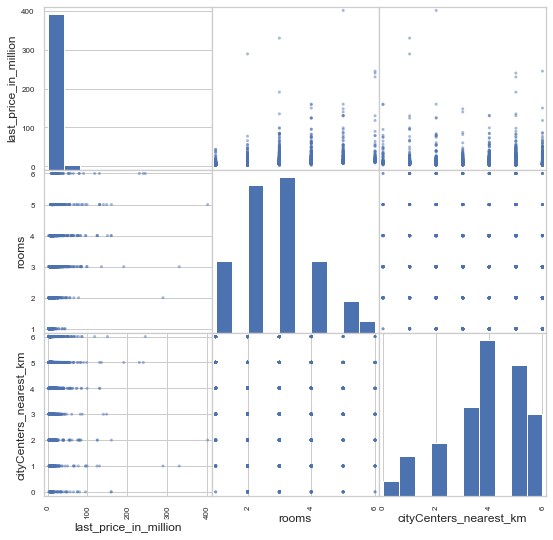

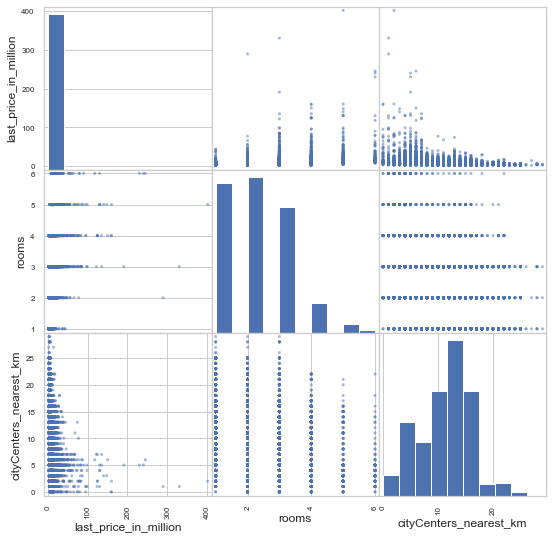

In [117]:
columns_to_compare = ['last_price_in_million', 'rooms', 'cityCenters_nearest_km']
pd.plotting.scatter_matrix(center_only[columns_to_compare], figsize=(9,9))
plt.show()
pd.plotting.scatter_matrix(spb_only[columns_to_compare], figsize=(9,9))
plt.show()

In [118]:
print('Санкт-Петербург')
print(spb_only[columns_to_compare].corr())
print()
print('Только центр города')
print(center_only[columns_to_compare].corr())

Санкт-Петербург
                        last_price_in_million  rooms  cityCenters_nearest_km
last_price_in_million                   1.000  0.376                  -0.294
rooms                                   0.376  1.000                  -0.282
cityCenters_nearest_km                 -0.294 -0.282                   1.000

Только центр города
                        last_price_in_million  rooms  cityCenters_nearest_km
last_price_in_million                   1.000  0.307                  -0.058
rooms                                   0.307  1.000                  -0.181
cityCenters_nearest_km                 -0.058 -0.181                   1.000


1) В центре чаще всего 2-3 комнаты, в Санкт-Петербурге в целом 1-2. Да и в целом квартиры в центре имеют большее количество комнат. Это видно на диаграмме  
2) Большая часть квартир в центре сосредоточена на расстоянии 4-5км от центра. По Санкт-Петербургу - 10-18км. Если сравнивать эти две выборки на корреляцию - по Санкт-Петербургу в целом она выражена сильнее.

In [119]:
print('Зависимость цены на квартиру от года размещения объявления в центре Санкт-Петербурга:')
print(center_only.groupby('year')['last_price_in_million'].mean().sort_values(ascending=False))
print()
print('Зависимость цены на квартиру от года размещения объявления в Санкт-Петербурге:')
print(spb_only.groupby('year')['last_price_in_million'].mean().sort_values(ascending=False))

Зависимость цены на квартиру от года размещения объявления в центре Санкт-Петербурга:
year
2014   25.027
2015   16.270
2019   14.792
2016   14.783
2017   13.855
2018   12.513
Name: last_price_in_million, dtype: float64

Зависимость цены на квартиру от года размещения объявления в Санкт-Петербурге:
year
2014   14.363
2015    9.816
2016    8.368
2019    7.930
2017    7.593
2018    7.287
Name: last_price_in_million, dtype: float64


Здесь в целом ситуация одинаковая: что в центре, что по Санкт-Петербургу в целом, цены на квартиры упали с 2014 года. К 2017 году этот тренд прекратился.

# <a class="anchor" id="5-bullet">5 Общий вывод</a>

1 На начальном этапе проекта были выявлены выбросы и пропуски почти во всех признаках. Они могут быть вызваны по нескольким причинам:  
а) Пользователь мог просто не указать значение признака (is_apartment, ceiling_height, balcony)  
б) На карте наличие признака могло отсутствовать (parks_around3000, parks_nearest, ponds_nearest)  
в) В случае с days_exposition пропуски могут означать, что объявление не снято.  
г) Так же были выявлены пропуски в одних и тех же строках у признаков parks_nearest, ponds_nearest,   cityCenters_nearest. Возможно, они получились на этапе сбора данных

2 Большинство пропусков были заполнены медианой, чтобы сгладить выбросы. Там, где есть корреляция между признаками, я сделал группировку по этим признакам и заполнил пропуски медианой по группе (например, living_area)

3 Булев тип сразу привел к int. В этом датафрейме есть такие метрики как: расстояние (кв м), число дней,кол-во водоемов, аэропортов). Для них больше подходит int. Некторые признаки (цену, этаж) укрупнил, чтобы в дальнейшем было удобнее делать визуализацию.

4.1 Исследование данных: по тем признакам, которые имеют важное значения для задач этого проекта были построены гистограммы, ящики с усами. На неочищенных от выбросов данных получились следующие выводы:  
а) Большинство квартир имеют цену продажи от 2,5 до 6 млн  
б) Чаще всего квартиры имеют 1-3 комнаты  
в) Чаще всего высота потолка от 2.5 до 2.8 метров  
г) Среднее число дней продажи квартиры почти в два раза выше медианы. Это говорит о том, что существует много выбросов, которые искажают среднее значение. На диаграмме это подтверждается - большая часть квартир продается в первые 100 дней. Необычно быстрые и долгие продажи квартир: до 10 и более 625 дней соответственно.

4.2 Редкие и выбивающиеся значения были убраны при помощи ящиков с усами.

4.3 Цена имеет коррреляцию с общей площадью квартиры - 0.677. Так же есть небольшая корреляция с количеством комнат - 0.367, и небольшая отрицательная корреляция со столбцом cityCenters_nearest: -0.219

4.4 На очищенных данных получились следующие выводы:
1) Чем больше комнат, тем выше цена  
2) Самая высокая в среднем цена пришлась на 2014г, далее идет снижение до 2017г  
3) Зависимость цены от месяца подачи объявления не выявлено  
4) Цена квартиры на первом этаже имеет более низкую стоимость, чем на последнем или другом.

4.5 Самые дорогие квартиры приходятся на Санкт-Петербург: чуть выше 100 тыс за кв м. Начиная с 7 км от центра цены на квартиры значительно меньше

4.6 Характеристика квартир в Санкт-Петербурге. Сравнение ситуации по центру и Санкт-Петербургу в целом.  
а) В целом в центре более крупные по площади квартиры: от 40 до 90 м кв. До фильтрации было 30-60 кв м.  
б) То же самое по цене: от 5 до 9 млн рублей. До фильтрации: 2.5 - 6 млн  
в) В центре чаще всего 2-3 комнаты, в Санкт-Петербурге в целом 1-2.  
г) В центре квартиры расположенным на более высоком этаже. В центре такие квартиры нахожятся начиная с 6 этажа. Тогда как во всем Санкт-Петербурге это на этот этаж приходится больше всего квартир. Можно предположить, что в центре больше многоэтажных домов. Пик в центре приходится на 12 этаж.  
д) В центре города квартиры в основном имеют расстояние 4-5 км от центра. По Санкт-Петербургу в целом расстояние от центра 10-18 км. В центре квартиры более дорогие  
е) Что в центре, что по Санкт-Петербургу в целом, цены на квартиры упали с 2014 года. К 2017 году этот тренд прекратился, после 2017 цены выросли незначительно.

Передо мной стояла задача провести исследование, которое прольет свет на то, какие признаки имеют наибольшое влияние на стоимость квартиры. После проделанной работы можно сделать вывод о том, что при построенииавтоматизированной системы оценки стоимости недвижимости следует обращать внимание на такие признаки, как: общая площадь, жилая площадь, количество комнат, расстояние от центра города. Начиная с 7км от центра, стоимость квартиры начинает падать. Квартиры в центре, в среднем, будут иметь большую стоимость и большее количество комнат. Наиболее дорогие квартиры будут находится в Санкт-Петербурге. Далее идет Пушкин и Кудрово. Наиболее дешевые квартиры находятся в Выборге.

Так же были выявлены некоторые артефакты, от которых пришлось избавиться: кухня менее 4 кв. м., жилая площадь менее9 кв. м., общая площадь - менее 16 кв. м. Были квартиры имеющие удивительно низкую стоимость при больой площади - такиеквартиры тоже было решено убрать.